# SQL

In [1]:
small_business_df = _deepnote_execute_sql('SELECT LATITUDE, LONGITUDE, LEGAL_NAME, TIF_Name\nFROM \'/work/Business Info By Size/SmallBusinessInfo.csv\'\nORDER BY TIF_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
small_business_df

LATITUDE  LONGITUDE                          LEGAL_NAME  \
0       41.699547 -87.642752  SAVER'S FRESH MARKET ROSELAND, L3C   
1       41.699547 -87.642752          YELLOW BANANA ILLINOIS LLC   
2       41.699547 -87.642752  SAVER'S FRESH MARKET ROSELAND, L3C   
3       41.707210 -87.628359     HUT FISH & CHICKEN & MORE, INC.   
4       41.707210 -87.628359                         THE HUT INC   
...           ...        ...                                 ...   
363630  41.921724 -87.757159         BIG CITY CONSTRUCTION, INC.   
363631  41.876817 -87.647353         LADYBUG MDL VAN BUREN 4 LLC   
363632  41.950391 -87.747379      NEW MILLENNIUM AUTO CARE, INC.   
363633  41.918179 -87.721842                       NERY MARTINEZ   
363634  41.778820 -87.705828  MIDDLE EAST FINANCIAL SERVICES INC   

                                                 TIF_Name  
0       ['105th Street and Vincennes Avenue', '107th/H...  
1       ['105th Street and Vincennes Avenue', '107th/H...  
2       ['105th Street and Vincennes Avenue', '107th/H...  
3       ['105th Street and Vincennes Avenue', 'Roselan...  
4       ['105th Street and Vincennes Avenue', 'Roselan...  
...                                                   ...  
363630                                                 []  
363631                                                 []  
363632                                                 []  
363633                                                 []  
363634                                                 []  

[363635 rows x 4 columns]

In [2]:
medium_business_df = _deepnote_execute_sql('SELECT LATITUDE, LONGITUDE, LEGAL_NAME, TIF_Name\nFROM \'/work/Business Info By Size/MediumBusinessInfo.csv\'\nORDER BY TIF_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
medium_business_df

LATITUDE  LONGITUDE                        LEGAL_NAME  \
0       41.707206 -87.628815             J AND A GAS MART INC.   
1       41.706999 -87.645783                    EUCLIN FRANCIS   
2       41.713951 -87.655314                  HERBERT C BARKER   
3       41.706376 -87.642671                   Verna Mae Scott   
4       41.706855 -87.658802               SAM FOOD MART, INC.   
...           ...        ...                               ...   
354481  41.884636 -87.624314      TRANSAGRA INTERNATIONAL INC.   
354482  41.802569 -87.674396         MIGUEL ANGEL DUARTE-SOLIS   
354483  41.792122 -87.787572  GUARANTEED MEDICAL SERVICE, INC.   
354484  41.786499 -87.694482                   EL VIAJERO INC.   
354485  41.857525 -87.640916           KEN TONE'S DRIVE-IN INC   

                                     TIF_Name  
0       ['105th Street and Vincennes Avenue']  
1       ['105th Street and Vincennes Avenue']  
2       ['105th Street and Vincennes Avenue']  
3       ['105th Street and Vincennes Avenue']  
4       ['105th Street and Vincennes Avenue']  
...                                       ...  
354481                                     []  
354482                                     []  
354483                                     []  
354484                                     []  
354485                                     []  

[354486 rows x 4 columns]

In [3]:
big_business_df = _deepnote_execute_sql('SELECT LATITUDE, LONGITUDE, LEGAL_NAME, TIF_Name\nFROM \'/work/Business Info By Size/BigBusinessInfo.csv\'\nORDER BY TIF_Name', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
big_business_df

LATITUDE  LONGITUDE                        LEGAL_NAME  \
0       41.699547 -87.642752                  MORAN FOODS, LLC   
1       41.699547 -87.642752                  MORAN FOODS, LLC   
2       41.699547 -87.642752                  MORAN FOODS, LLC   
3       41.699547 -87.642752              DELRAY FARMS, L.L.C.   
4       41.699547 -87.642752                  MORAN FOODS, LLC   
...           ...        ...                               ...   
315490  41.888000 -87.622565                 HYATT CORPORATION   
315491  41.893251 -87.632493             GRAHAM ENTERPRISE INC   
315492  41.735266 -87.704080        SUPER DISCOUNT STORE, INC.   
315493  41.895061 -87.623508  DHM CHICAGO HOTEL LESSEE GP, LLC   
315494  41.992184 -87.689851                       Z FRANK INC   

                                                 TIF_Name  
0       ['105th Street and Vincennes Avenue', '107th/H...  
1       ['105th Street and Vincennes Avenue', '107th/H...  
2       ['105th Street and Vincennes Avenue', '107th/H...  
3       ['105th Street and Vincennes Avenue', '107th/H...  
4       ['105th Street and Vincennes Avenue', '107th/H...  
...                                                   ...  
315490                                                 []  
315491                                                 []  
315492                                                 []  
315493                                                 []  
315494                                                 []  

[315495 rows x 4 columns]

# Python

### Setting up functions and a frame to be used for all types of businesses

In [4]:
!pip install geopy
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
import json
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
frame = gpd.read_file('BoundariesCommunity.geojson')
merged_geometry = frame.geometry.unary_union
tif_geo = gpd.read_file('Boundaries TIF.geojson')[['name', 'geometry']]
All_df = pd.read_csv('BusWithTIF.csv')
classes = All_df['TIF_Name'].unique()
cmap = get_cmap('tab20')
class_colors = {class_name: cmap(i % 20) for i, class_name in enumerate(classes)}

In [6]:
def getInOutIndices(df):
    inTIF = []
    outTIF = []
    for index, row in df.iterrows():
        if len(row['TIF_Name']) <= 2:
            outTIF.append(index)
        else:
            inTIF.append(index)
    
    return inTIF, outTIF

def business_out_points_plot(business_out_df):
    business_out_points = gpd.GeoDataFrame(
        business_out_df, geometry=gpd.points_from_xy(business_out_df.LONGITUDE,business_out_df.LATITUDE))
    fig, ax = plt.subplots(1, 1, figsize=(60, 70))
    frame.plot(ax=ax)
    business_out_points.plot(ax=ax, color='white', markersize=5)

def business_in_points_plot(business_in_df):
    business_in_points = gpd.GeoDataFrame(
        business_in_df, geometry=gpd.points_from_xy(business_in_df.LONGITUDE,business_in_df.LATITUDE))
    
    fig, ax = plt.subplots(1, 1, figsize=(40, 40))
    gpd.GeoSeries([merged_geometry]).plot(ax=ax, facecolor='grey', edgecolor='black', linewidth=1, alpha=0.2)
    for class_name, color in class_colors.items():
        class_gdf = business_in_points[business_in_points['TIF_Name'] == class_name]
        class_gdf.plot(ax=ax, color=color, label=class_name, markersize=10, alpha=0.7)

    plt.show()

### Visualize whole TIF according to the color scheme

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for class_name, color in class_colors.items():
    dummy = tif_geo[tif_geo['name'] == class_name[2:-2]]
    dummy.plot(ax=ax, color=color)

### Small Businesses Visualization

In [7]:
small_business_in, small_business_out = getInOutIndices(small_business_df)
small_business_in_df = small_business_df.iloc[small_business_in]
small_business_out_df = small_business_df.iloc[small_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

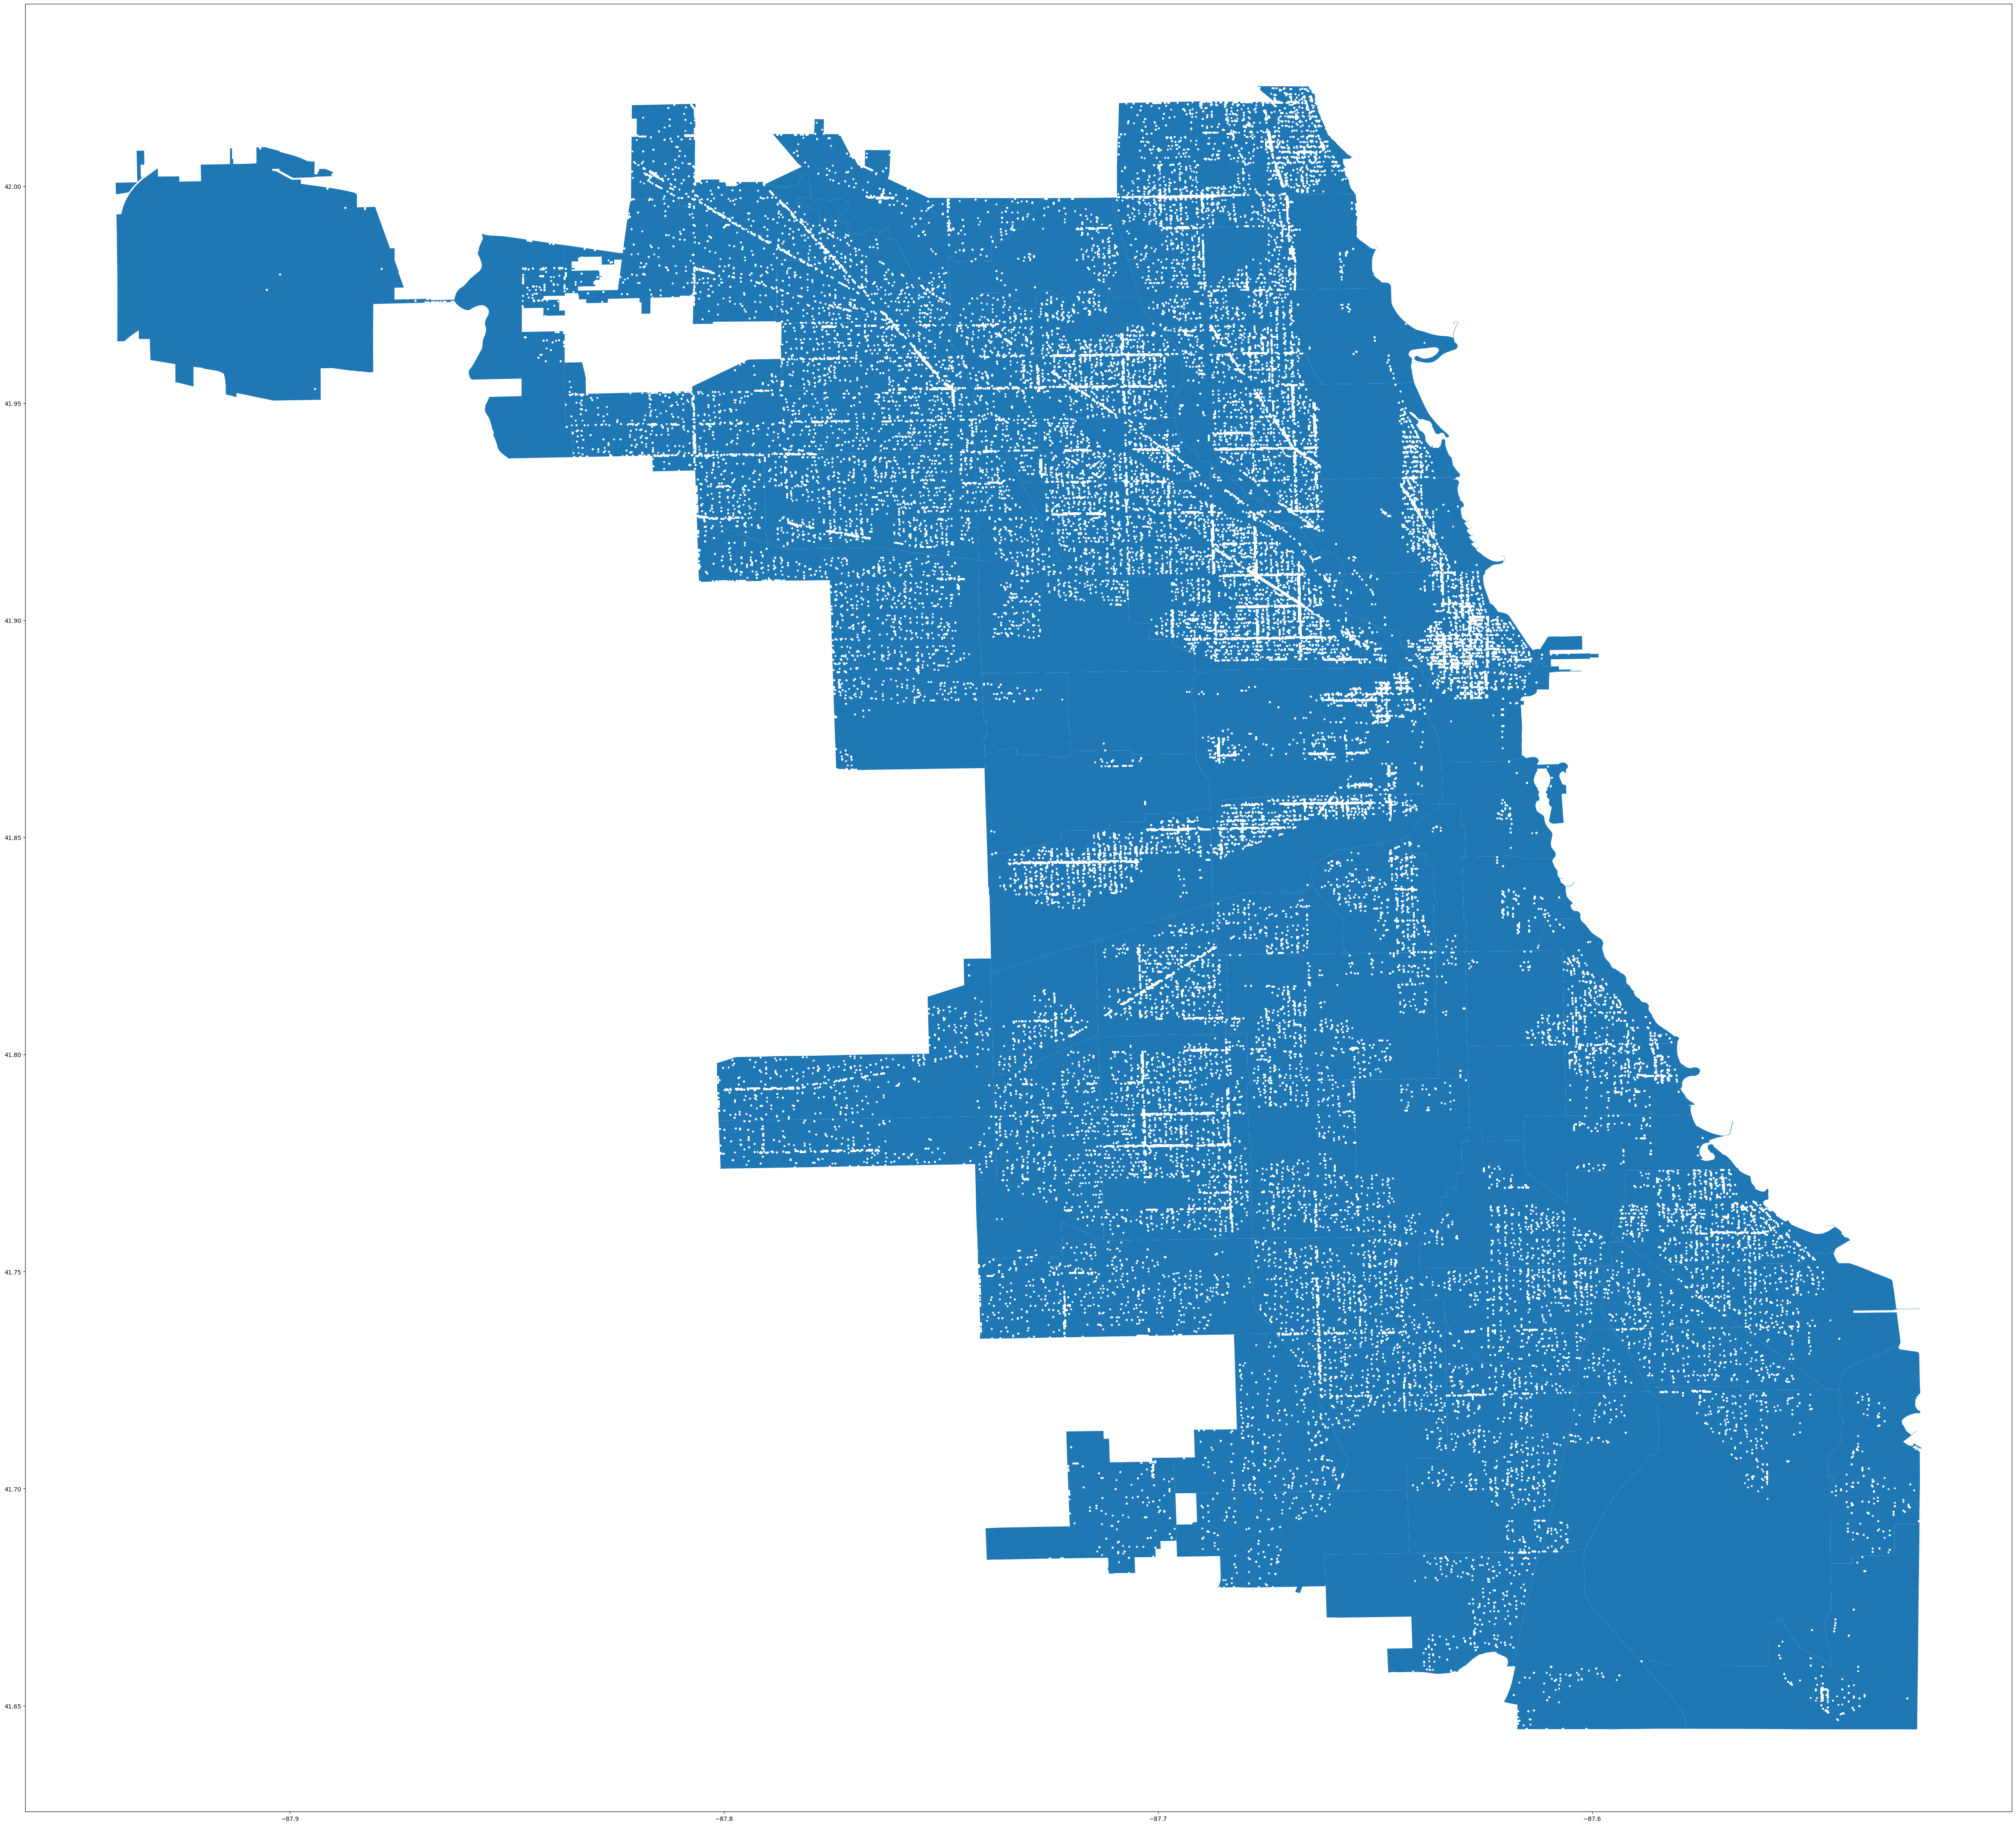

In [9]:
business_out_points_plot(small_business_out_df)

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


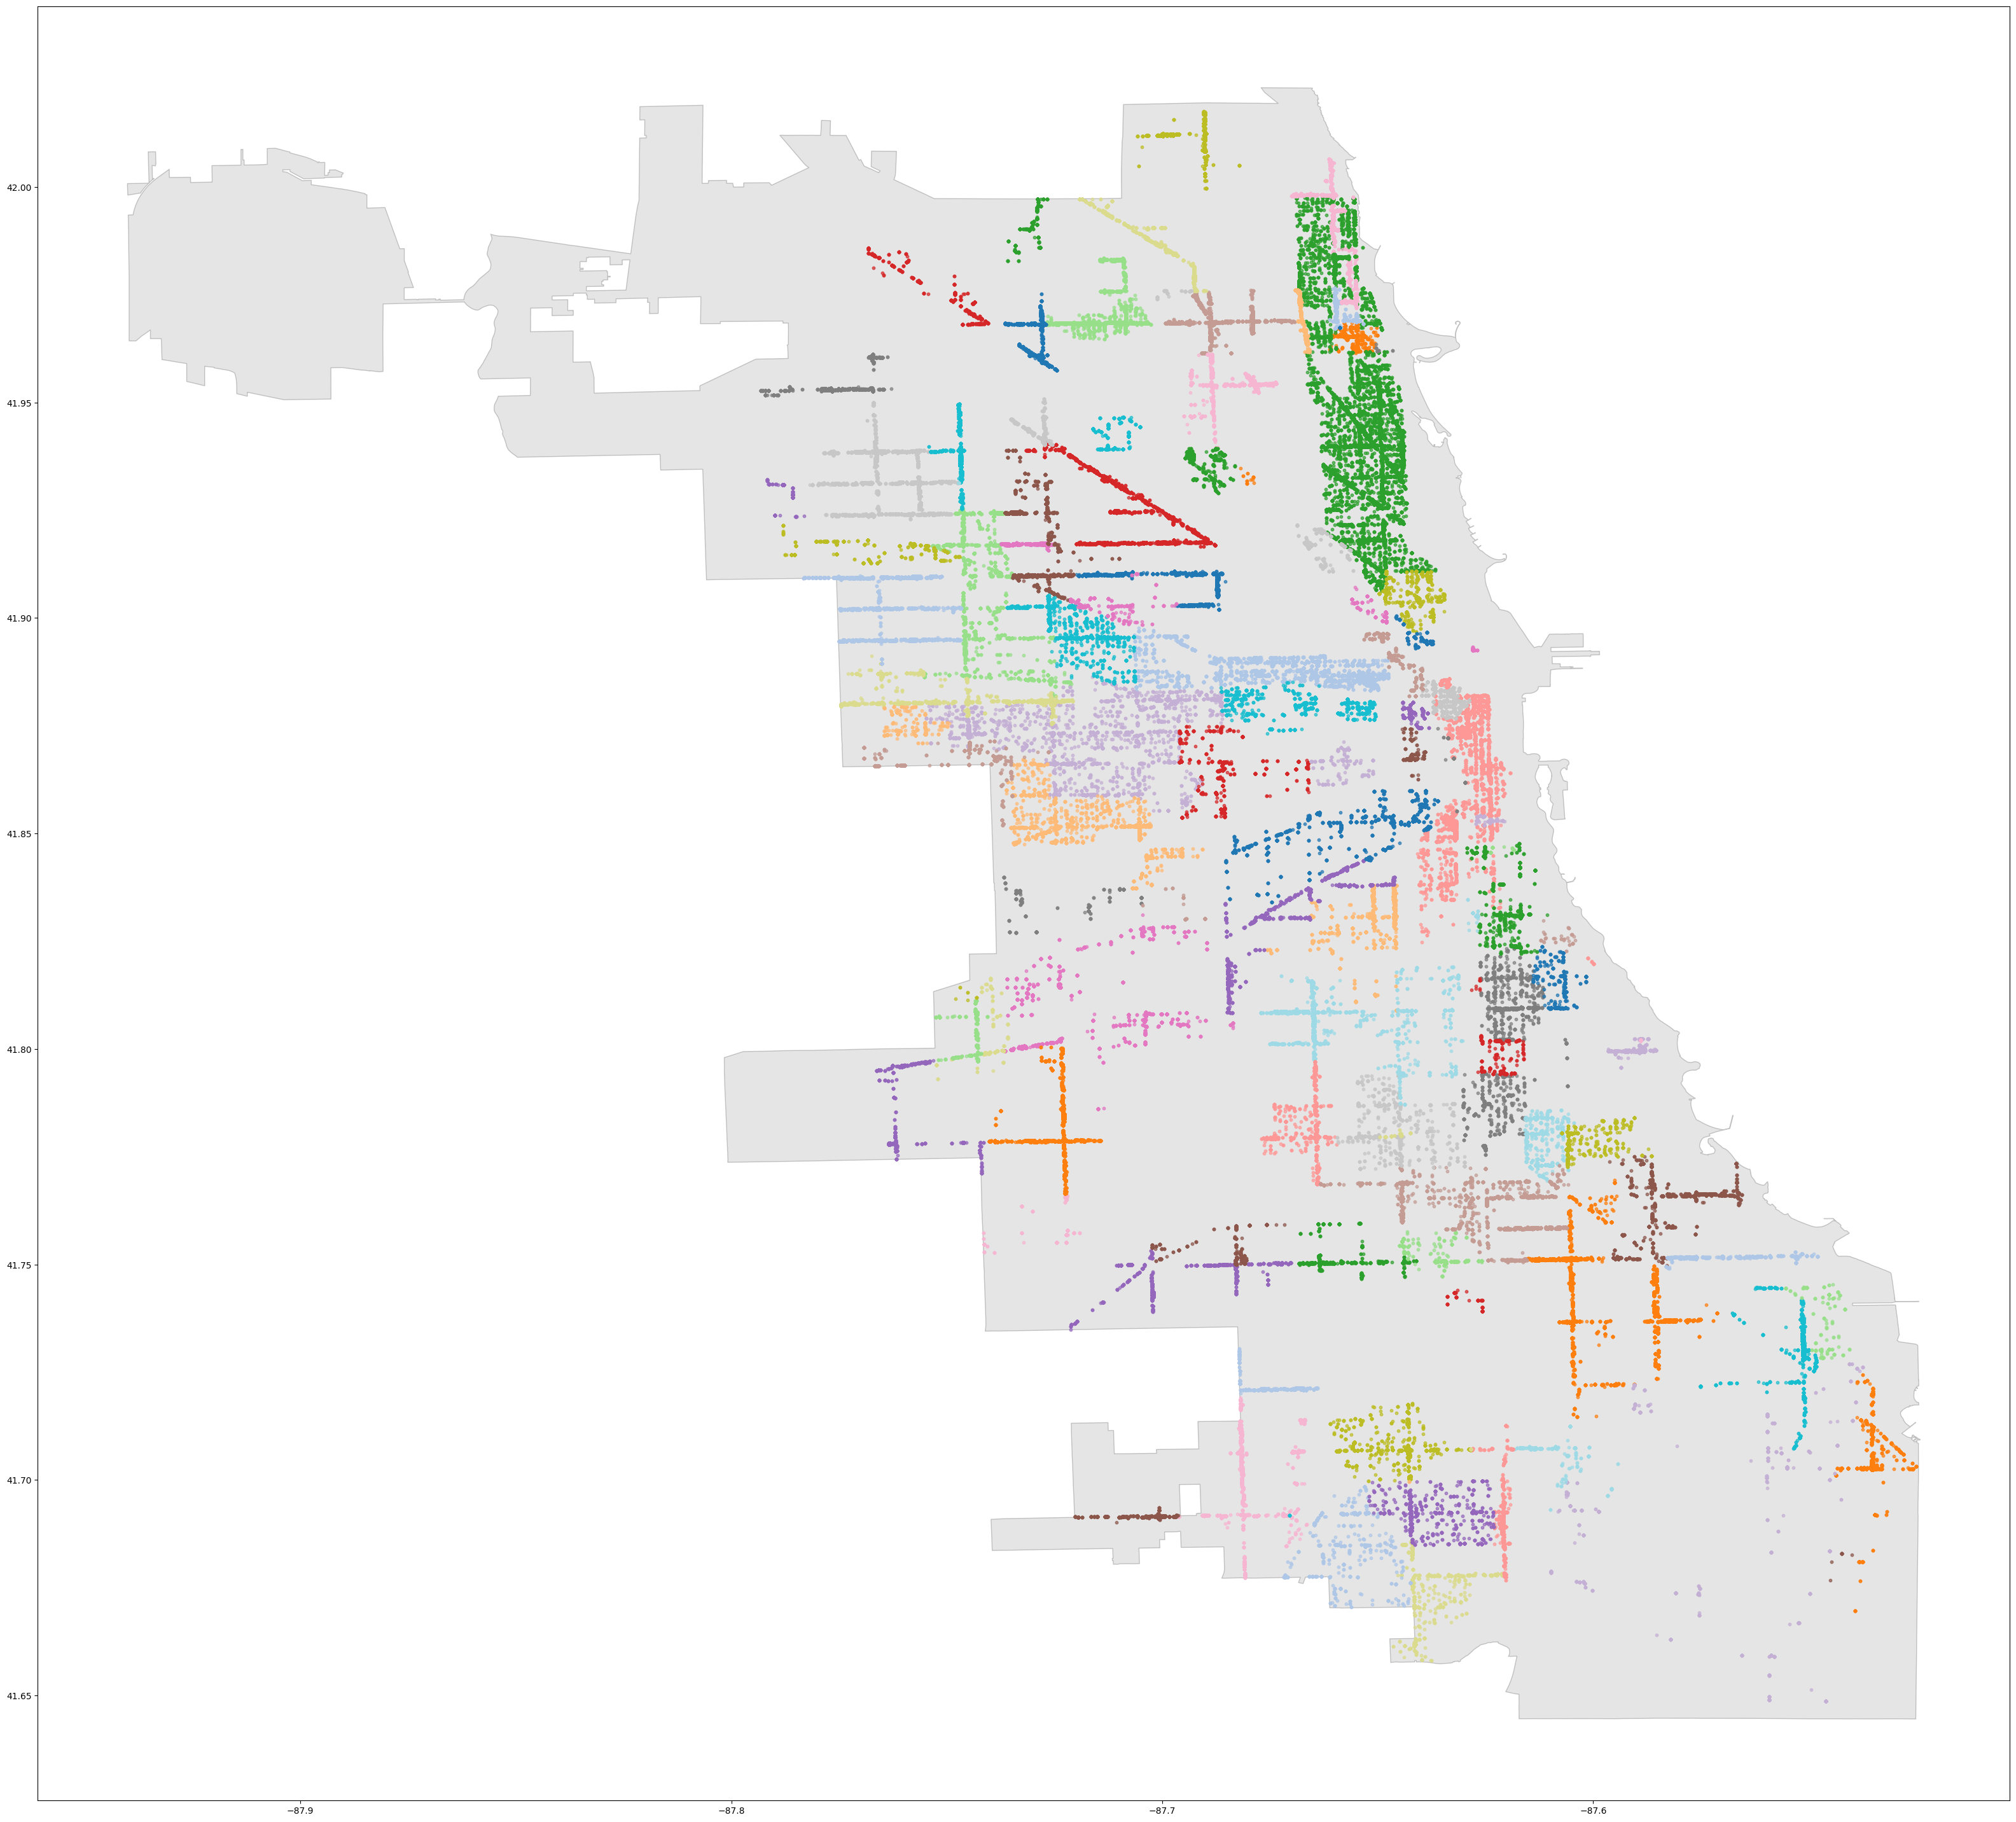

In [10]:
business_in_points_plot(small_business_in_df)

In [ ]:
len(small_business_in_df)

### Medium Businesses Visualizations

In [11]:
medium_business_in, medium_business_out = getInOutIndices(medium_business_df)
medium_business_in_df = medium_business_df.iloc[medium_business_in]
medium_business_out_df = medium_business_df.iloc[medium_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

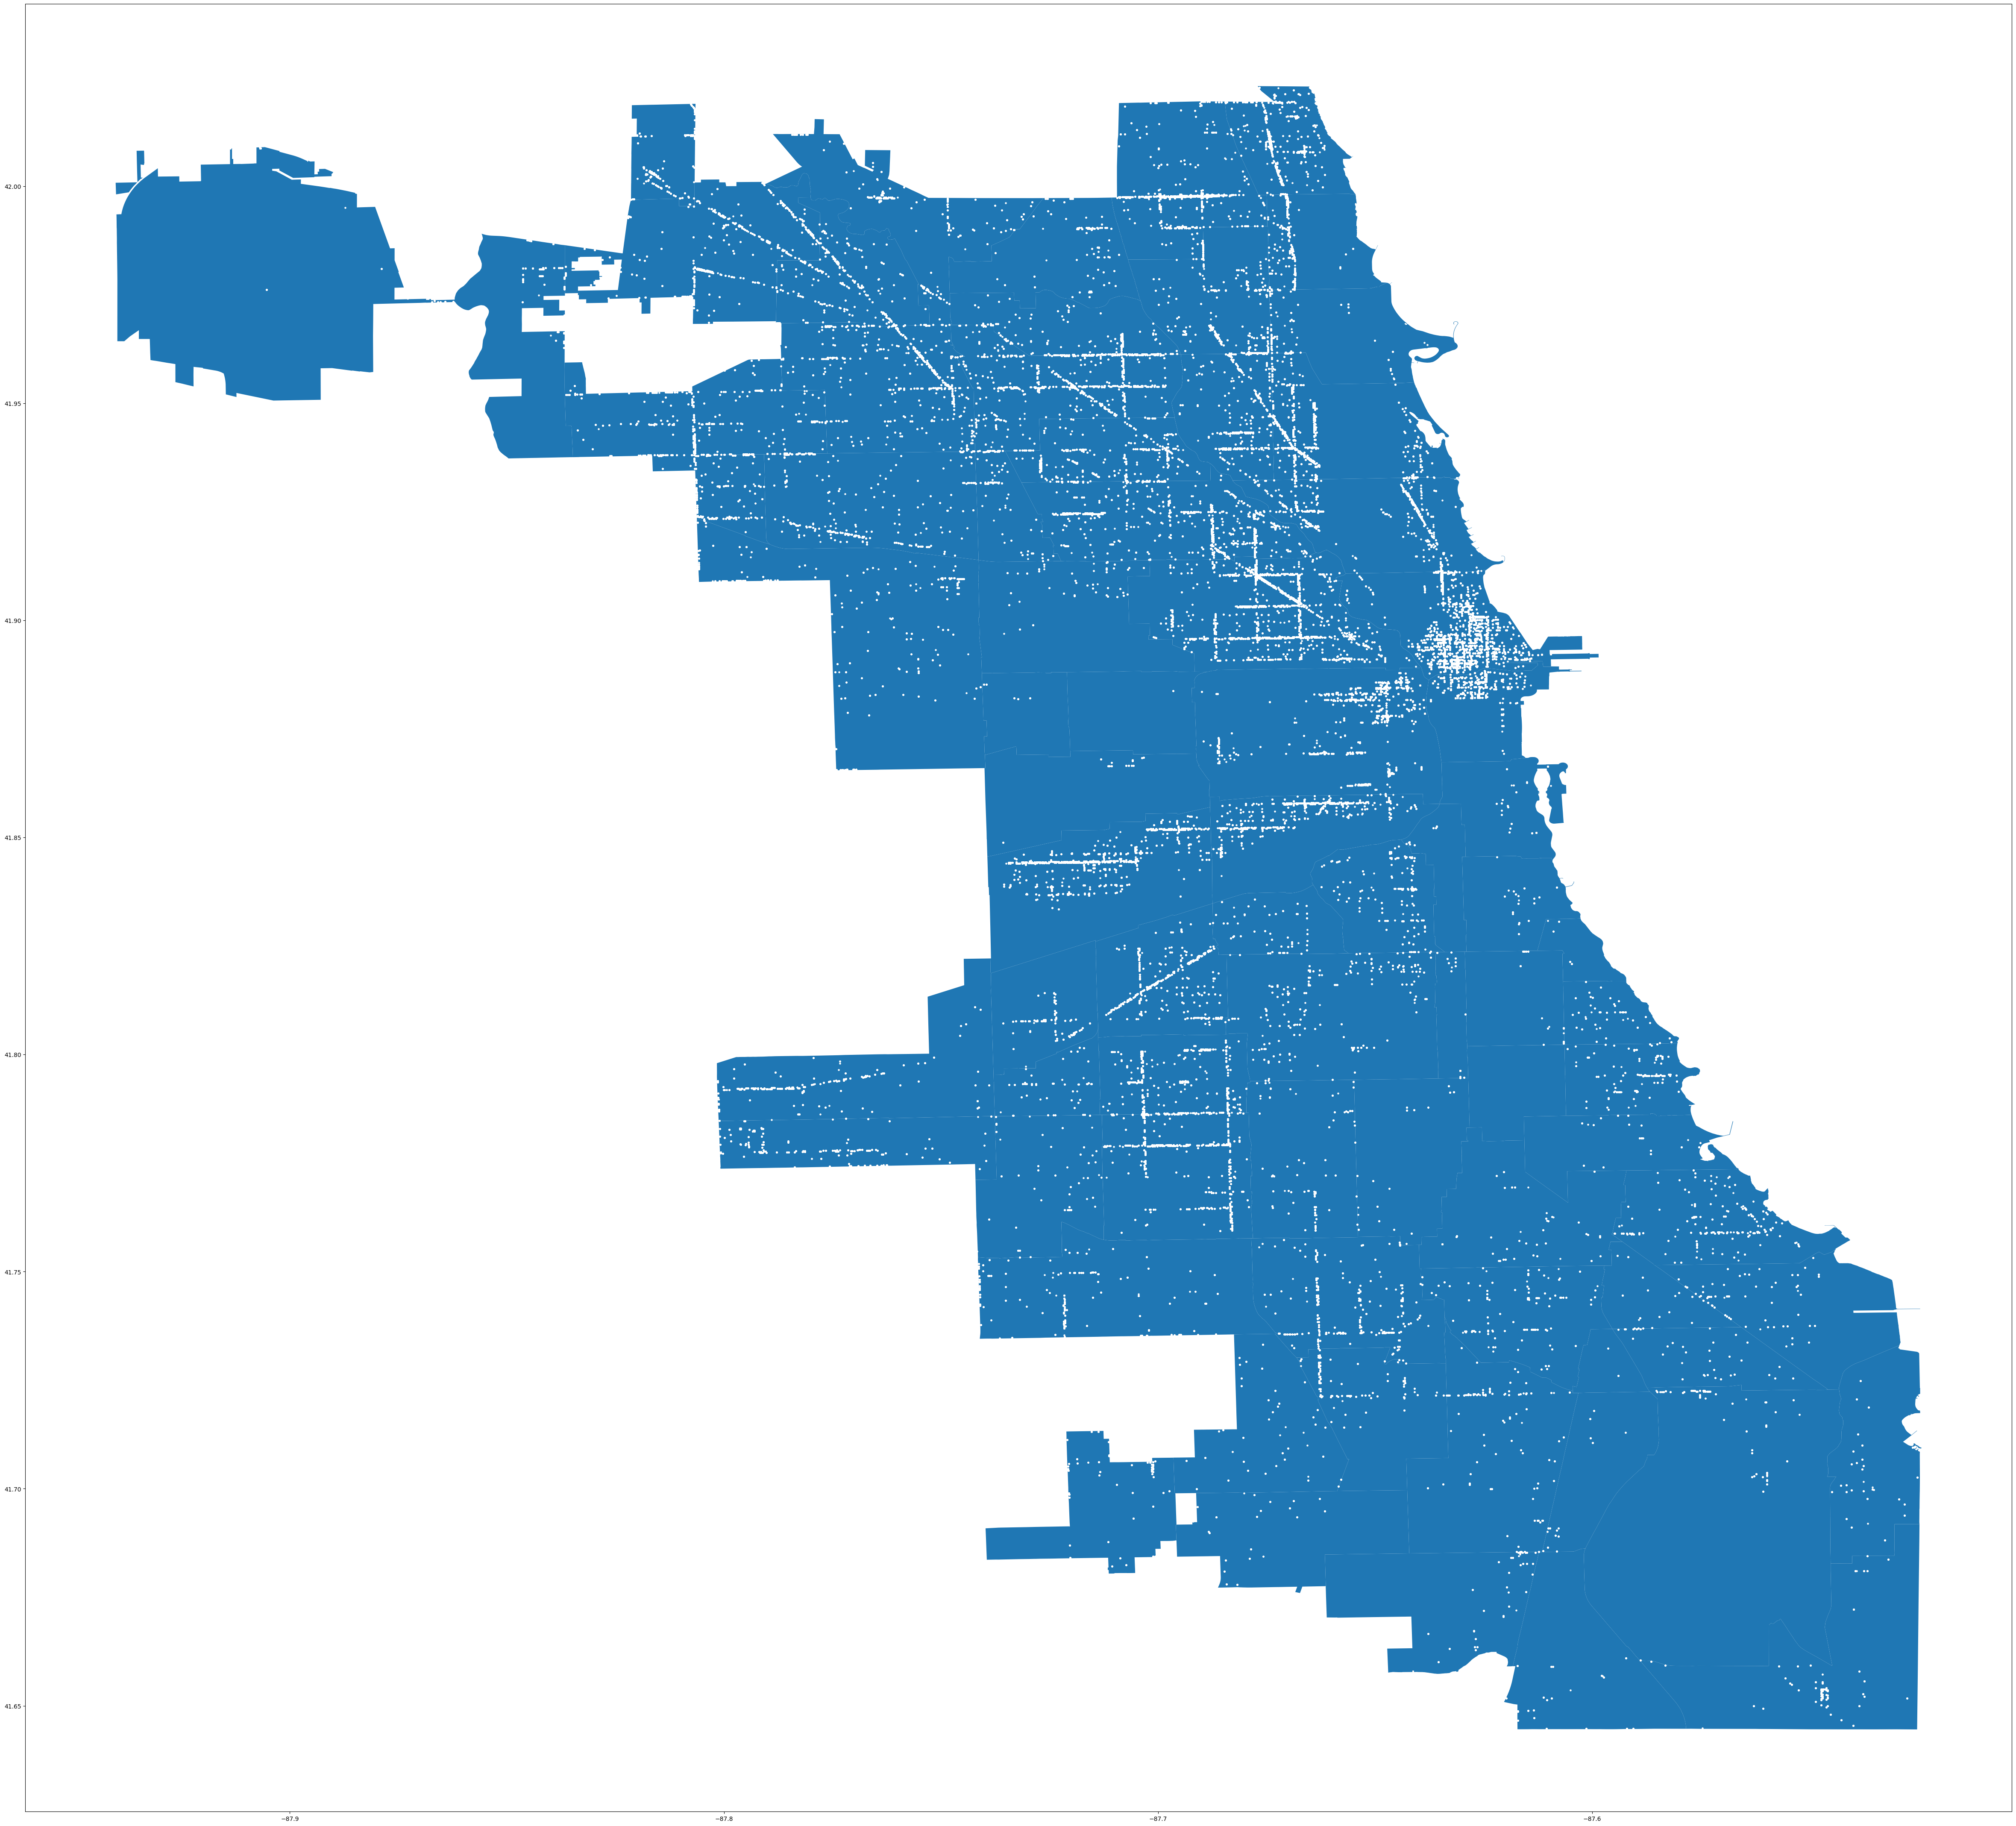

In [12]:
business_out_points_plot(medium_business_out_df)

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/shared-libs/python3.9/py/lib/pytho

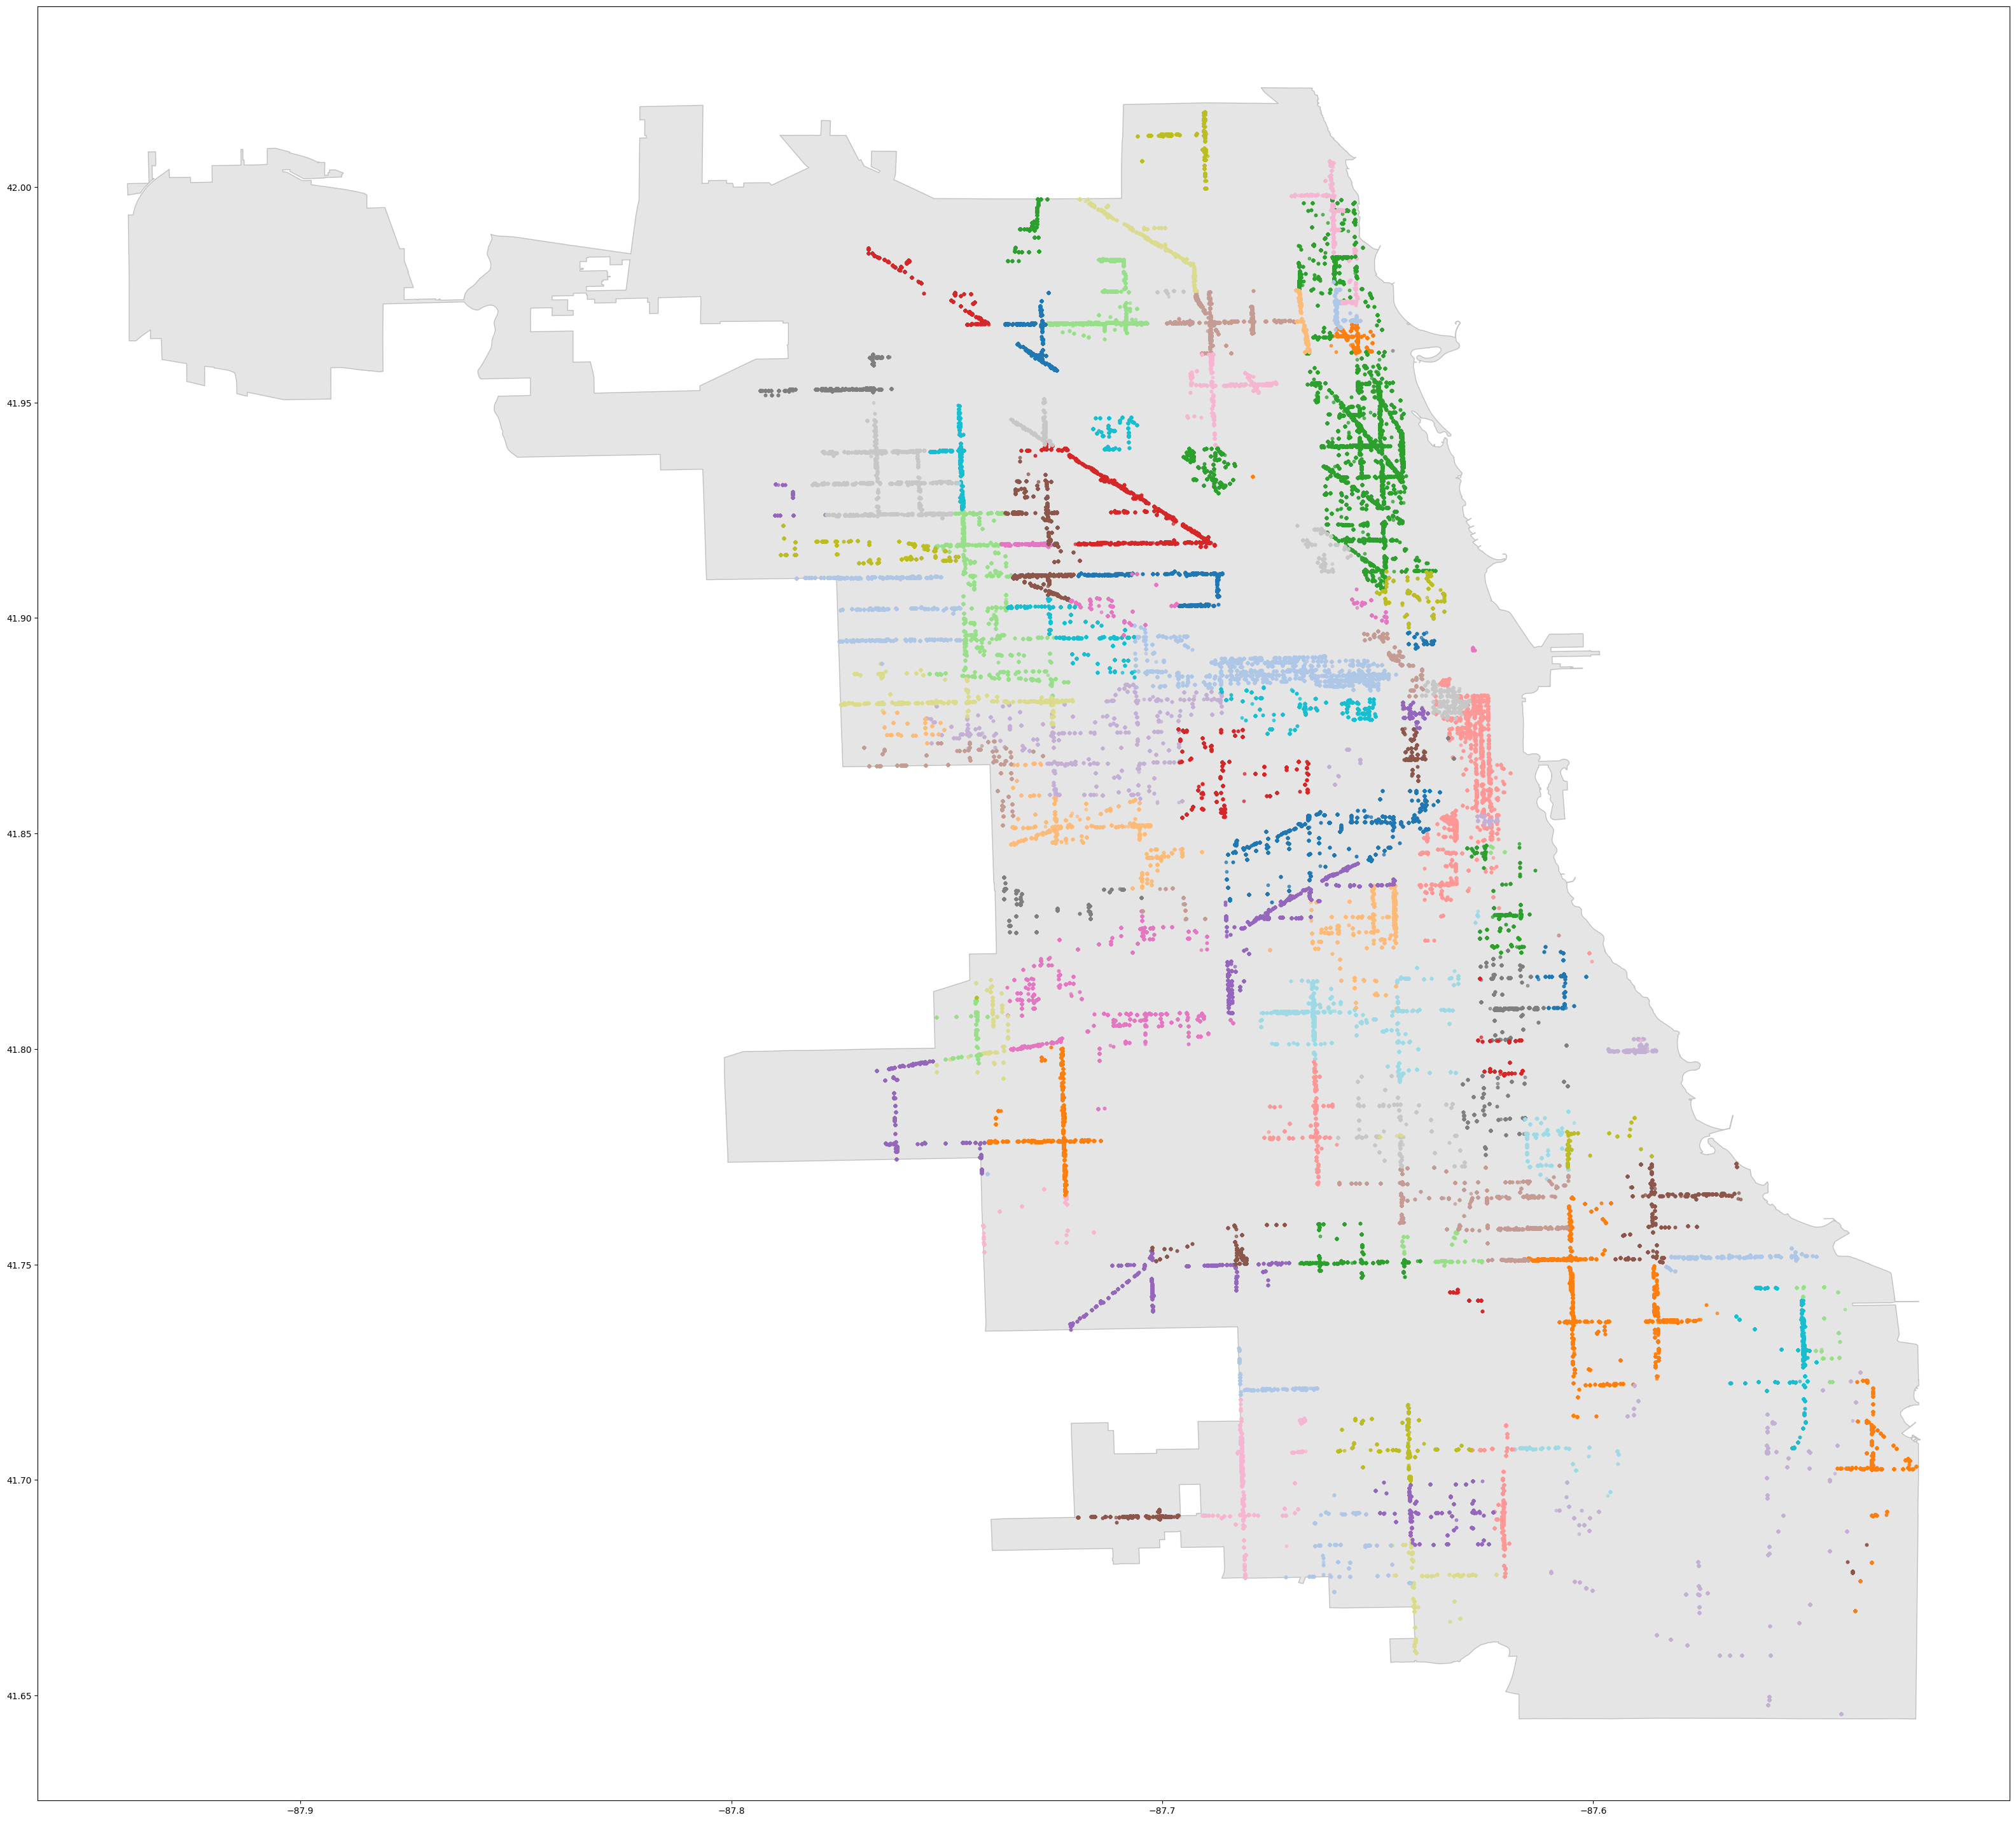

In [13]:
business_in_points_plot(medium_business_in_df)

### Big Businesses Visualizations

In [14]:
big_business_in, big_business_out = getInOutIndices(big_business_df)
big_business_in_df = big_business_df.iloc[big_business_in]
big_business_out_df = big_business_df.iloc[big_business_out][['LEGAL_NAME', 'LATITUDE', 'LONGITUDE']]

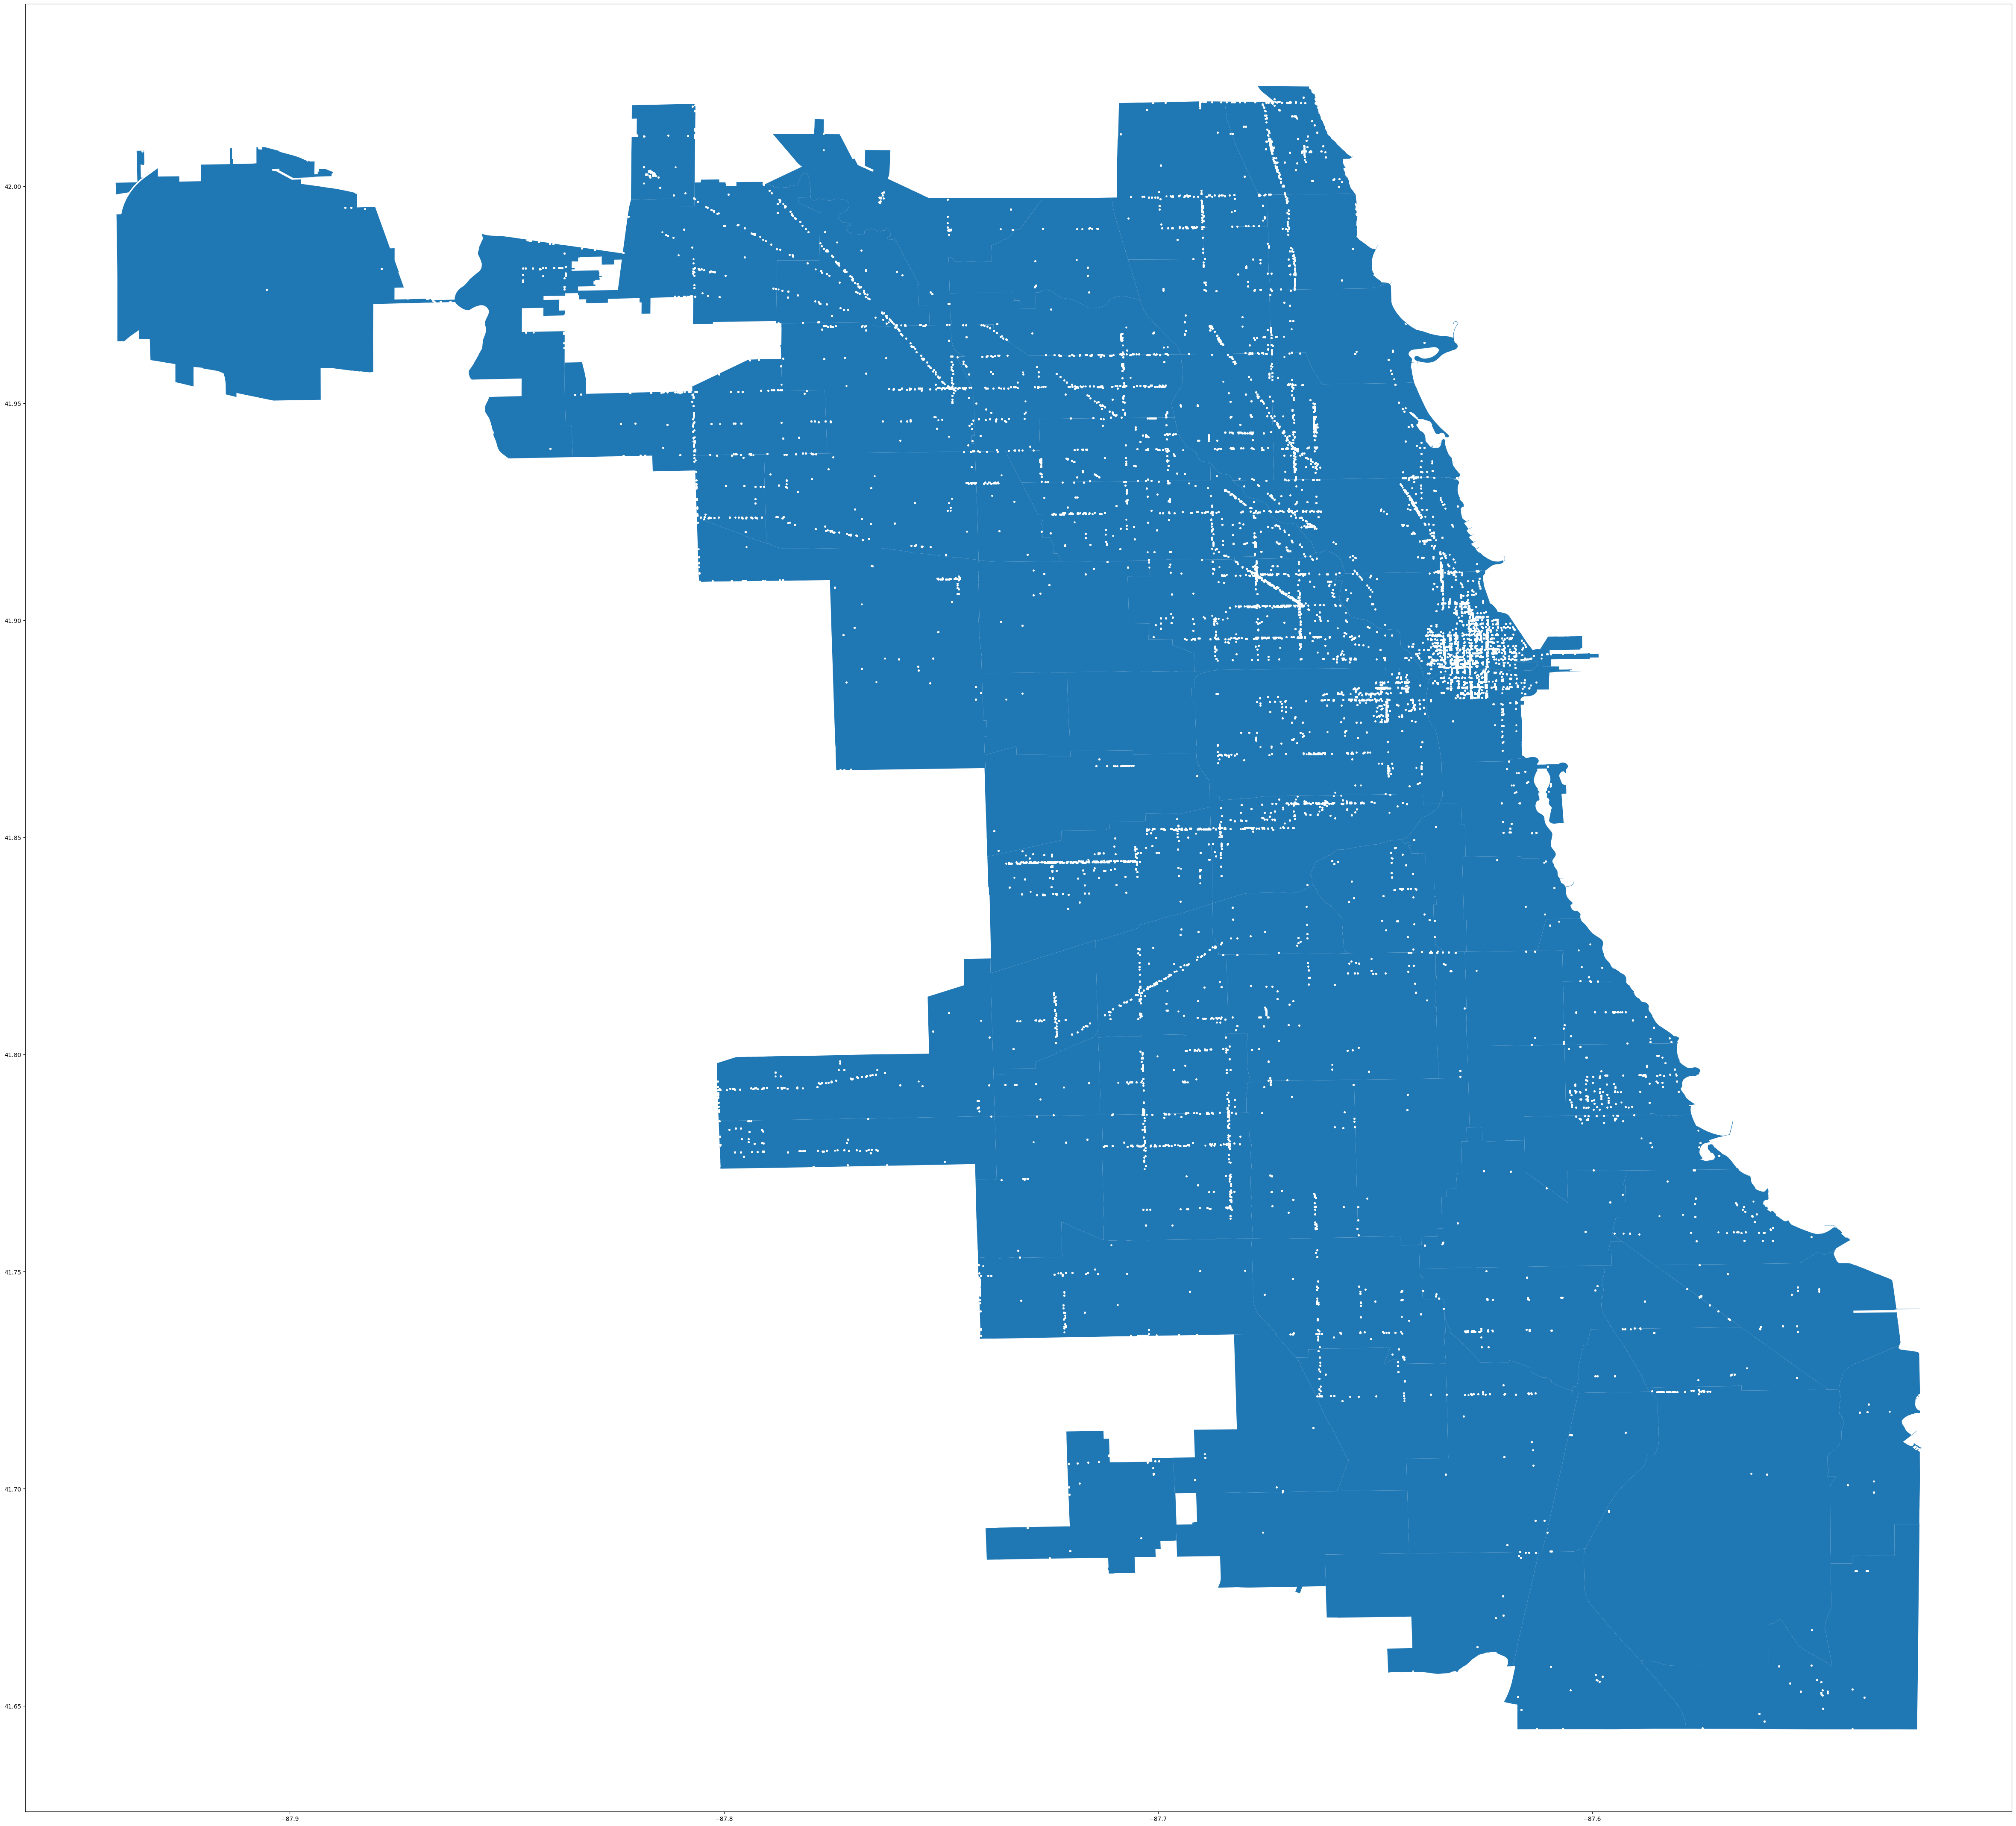

In [15]:
business_out_points_plot(big_business_out_df)

In [ ]:
business_in_points_plot(big_business_in_df)

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>